In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [302]:
df = pd.read_csv(r"C:\Users\SSINGHEE\Downloads\food_orders_new_delhi (1).csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [303]:
df.columns=[str(x).replace(" ","_") for x in df.columns]
df.head()

,Order_ID,Customer_ID,Restaurant_ID,Order_Date_and_Time,Delivery_Date_and_Time,Order_Value,Delivery_Fee,Payment_Method,Discounts_and_Offers,Commission_Fee,Payment_Processing_Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [304]:
df['Discounts_and_Offers'] = df['Discounts_and_Offers'].fillna("0 ")
df['Discounts_and_Offers']

0         5% on App
1               10%
2      15% New User
3                0 
4      50 off Promo
           ...     
995       5% on App
996              0 
997              0 
998    15% New User
999    15% New User
Name: Discounts_and_Offers, Length: 1000, dtype: object

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order_ID                1000 non-null   int64 
 1   Customer_ID             1000 non-null   object
 2   Restaurant_ID           1000 non-null   object
 3   Order_Date_and_Time     1000 non-null   object
 4   Delivery_Date_and_Time  1000 non-null   object
 5   Order_Value             1000 non-null   int64 
 6   Delivery_Fee            1000 non-null   int64 
 7   Payment_Method          1000 non-null   object
 8   Discounts_and_Offers    1000 non-null   object
 9   Commission_Fee          1000 non-null   int64 
 10  Payment_Processing_Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [68]:
# df['DiscountsCleaned'] = df['Discounts and Offers'].apply(lambda x: str(x).split(" ")[0])
# df.head()

In [70]:
# for i in len(range(df['Discounts and Offers'])):
#     if 'off' in df['Discounts and Offers'][i]:
#         df['DiscountAmt'][i] = float(df['Discounts and Offers'][i].split(" ")[0])
#     elif '%' in df['Discounts and Offers'][i]:
#         percent = float(df['Discounts and Offers'][i].split("%")[0])
#         df['DiscountAmt'][i] = percent * df['OrderValue']/100
#     else:
#         df['DiscountAmt'][i]= 0.0

In [306]:
# take a df as an input for lambda
df['DiscountAmt'] = df.apply(
    lambda row: float(str(row['Discounts_and_Offers']).split(" ")[0])
    if "off" in str(row['Discounts_and_Offers']).lower() else
    (float(str(row['Discounts_and_Offers']).split("%")[0]) * row['Order_Value'] / 100)
    if '%' in str(row['Discounts_and_Offers']) else 0.0,
    axis=1
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Customer_ID             1000 non-null   object 
 2   Restaurant_ID           1000 non-null   object 
 3   Order_Date_and_Time     1000 non-null   object 
 4   Delivery_Date_and_Time  1000 non-null   object 
 5   Order_Value             1000 non-null   int64  
 6   Delivery_Fee            1000 non-null   int64  
 7   Payment_Method          1000 non-null   object 
 8   Discounts_and_Offers    1000 non-null   object 
 9   Commission_Fee          1000 non-null   int64  
 10  Payment_Processing_Fee  1000 non-null   int64  
 11  Refunds/Chargebacks     1000 non-null   int64  
 12  DiscountAmt             1000 non-null   float64
dtypes: float64(1), int64(6), object(6)
memory usage: 101.7+ KB


In [307]:
df.head()
df['Order_Date_and_Time'] = pd.to_datetime(df['Order_Date_and_Time'])
df['Delivery_Date_and_Time'] = pd.to_datetime(df['Delivery_Date_and_Time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order_ID                1000 non-null   int64         
 1   Customer_ID             1000 non-null   object        
 2   Restaurant_ID           1000 non-null   object        
 3   Order_Date_and_Time     1000 non-null   datetime64[ns]
 4   Delivery_Date_and_Time  1000 non-null   datetime64[ns]
 5   Order_Value             1000 non-null   int64         
 6   Delivery_Fee            1000 non-null   int64         
 7   Payment_Method          1000 non-null   object        
 8   Discounts_and_Offers    1000 non-null   object        
 9   Commission_Fee          1000 non-null   int64         
 10  Payment_Processing_Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
 12  DiscountAmt             1000 non-null   float64  

In [135]:
#df.columns = df.columns.apply(lambda x: str(x).replace(" ","_"))

AttributeError: 'Index' object has no attribute 'apply'

In [308]:
df1=df.groupby("Payment_Method")['Order_ID'].nunique().reset_index()
df1.rename(columns = {'Order_ID':'Num_orders'},inplace= True)

In [309]:
px.bar(df1 ,x="Payment_Method", y = "Num_orders")

In [310]:
import datetime
df['TimeTaken'] = (df['Delivery_Date_and_Time']-df['Order_Date_and_Time'])
df['delivered_in_mins'] = df['TimeTaken'].dt.total_seconds()/60.0
df

,Order_ID,Customer_ID,Restaurant_ID,Order_Date_and_Time,Delivery_Date_and_Time,Order_Value,Delivery_Fee,Payment_Method,Discounts_and_Offers,Commission_Fee,Payment_Processing_Fee,Refunds/Chargebacks,DiscountAmt,TimeTaken,delivered_in_mins
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,95.70,0 days 01:28:00,88.0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,98.60,0 days 00:35:00,35.0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,140.55,0 days 00:58:00,58.0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,0,146,27,0,0.00,0 days 00:46:00,46.0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,50.00,0 days 01:29:00,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50,41.25,0 days 00:42:00,42.0
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,0,110,42,0,0.00,0 days 01:20:00,80.0
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,0,64,31,0,0.00,0 days 01:01:00,61.0
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,34,0,212.10,0 days 01:44:00,104.0


In [142]:
df2 = df.groupby('delivered_in_mins')['Order_ID'].nunique().reset_index().rename(columns = {'Order_ID':'num_orders'})
pd.cut(df2['delivered_in_mins'],bins = [0,30,45,60,90,120])

0       (0, 30]
1      (30, 45]
2      (30, 45]
3      (30, 45]
4      (30, 45]
        ...    
85    (90, 120]
86    (90, 120]
87    (90, 120]
88    (90, 120]
89    (90, 120]
Name: delivered_in_mins, Length: 90, dtype: category
Categories (5, interval[int64, right]): [(0, 30] < (30, 45] < (45, 60] < (60, 90] < (90, 120]]

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   Order_ID                1000 non-null   int64          
 1   Customer_ID             1000 non-null   object         
 2   Restaurant_ID           1000 non-null   object         
 3   Order_Date_and_Time     1000 non-null   datetime64[ns] 
 4   Delivery_Date_and_Time  1000 non-null   datetime64[ns] 
 5   Order_Value             1000 non-null   int64          
 6   Delivery_Fee            1000 non-null   int64          
 7   Payment_Method          1000 non-null   object         
 8   Discounts_and_Offers    1000 non-null   object         
 9   Commission_Fee          1000 non-null   int64          
 10  Payment_Processing_Fee  1000 non-null   int64          
 11  Refunds/Chargebacks     1000 non-null   int64          
 12  DiscountAmt             1000 non-nu

In [312]:
df['Total_Cost'] = df['Delivery_Fee']+df['Payment_Processing_Fee']+df['DiscountAmt']
df['Revenue'] = df['Commission_Fee']
df['Profit'] = df['Revenue']-df['Total_Cost']

total_orders = df['Order_ID'].nunique()
total_cost = df['Total_Cost'].sum()
total_revenue = df['Revenue'].sum()
total_profit = df['Profit'].sum()

In [313]:
#important metrics
{'Total_Orders':total_orders,'Total_Cost':round(total_cost,2),'Total_revenue':total_revenue,'Total_Profit':total_profit}

{'Total_Orders': 1000,
 'Total_Cost': 132741.85,
 'Total_revenue': 126990,
 'Total_Profit': -5751.85}

<Axes: xlabel='delivered_in_mins', ylabel='Total_Cost'>

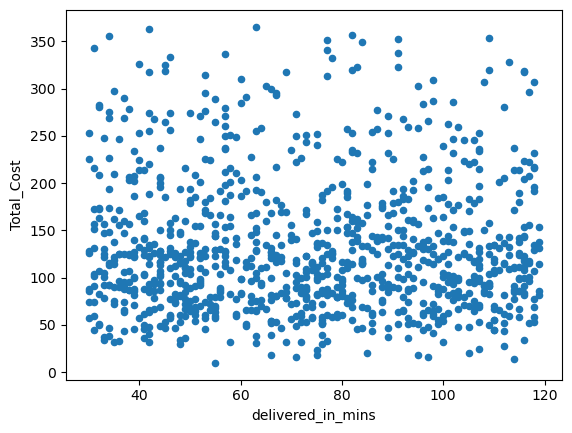

In [314]:
#strategize as to how to improve these metrics
df.plot(kind = 'scatter', x = 'delivered_in_mins', y = 'Total_Cost')
#plt.scatter?

Text(0, 0.5, 'Amount (INR)')

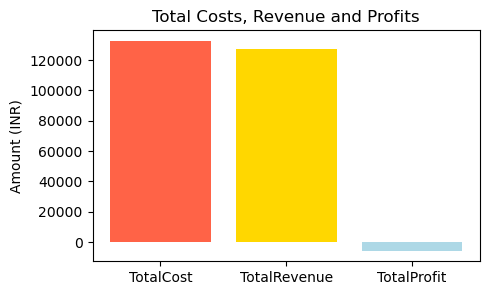

In [315]:
Total_Values = [total_cost,total_revenue,total_profit]
Totals = ['TotalCost','TotalRevenue','TotalProfit']
fig = plt.figure(figsize = (5,3))
plt.bar(Totals,Total_Values, color = ['tomato','gold','lightblue'])
plt.title('Total Costs, Revenue and Profits')
plt.ylabel('Amount (INR)')

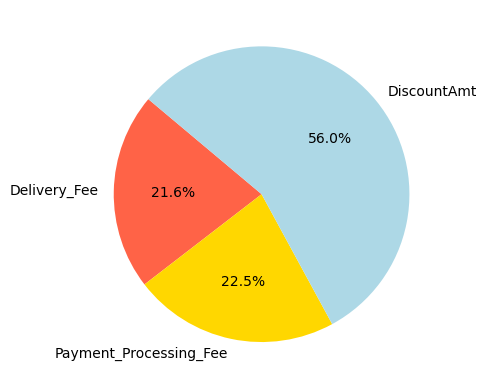

In [316]:
cost_heads = df[['Delivery_Fee','Payment_Processing_Fee','DiscountAmt']].sum()
plt.pie(cost_heads,labels = cost_heads.index, autopct = '%1.1f%%',startangle =140, colors = ['tomato','gold','lightblue'])
plt.show()
#about 56% of costs are attributed to Discounts
#Discounts have a significant portions of the cost indicating that promotional strategies
#have a significant impact on the overall profitability

<Axes: xlabel='Payment_Method'>

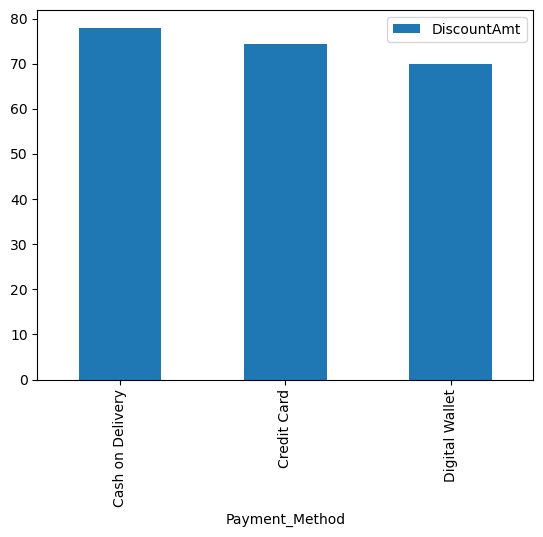

In [317]:
df3 = df.groupby('Payment_Method')['DiscountAmt'].mean().reset_index()
df3
df3.plot(kind = 'bar', x = 'Payment_Method', y = 'DiscountAmt')
#no significant difference in discount amount across diff payment modes indicating company 
#does not have a preferred medium when it comes to revenue

<Axes: xlabel='Payment_Method', ylabel='Profit'>

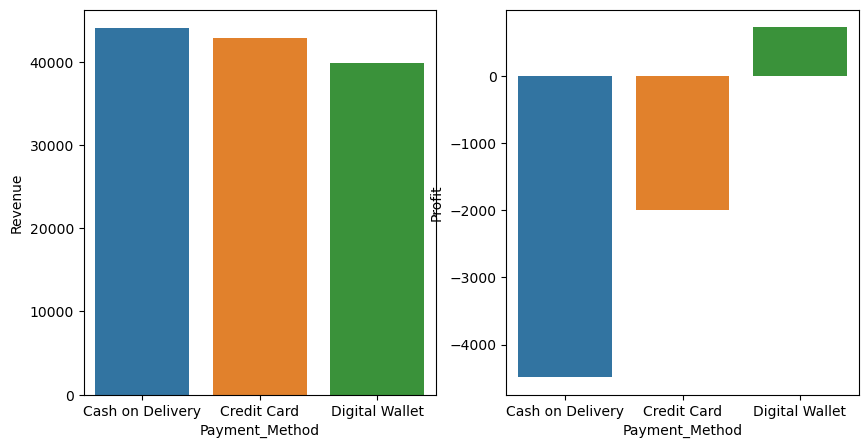

In [318]:
df4 = df.groupby('Payment_Method')['Revenue'].sum().reset_index()
df5 = df.groupby('Payment_Method')['Profit'].sum().reset_index()
fig,axes =plt.subplots(1,2, figsize = (10,5))
sns.barplot(data = df4, x = 'Payment_Method', y = 'Revenue', ax = axes[0])
sns.barplot(data = df5, x = 'Payment_Method', y = 'Profit', ax = axes[1])

# No significant variance in revenue amounts across 3 payment methods
#Howver, revenue is highest for COD methods, profit is the lowest

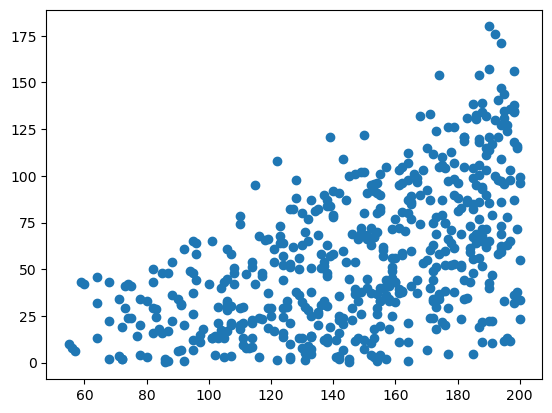

In [319]:
# Need to devise new strategy for profits
#To find a sweet spot for charging commission fees and offering discounts
profitable_orders = df[df['Profit']>0]
plt.scatter(x = 'Commission_Fee', y ='Profit',data = profitable_orders)

In [320]:
profitable_orders['Commission%'] = round((profitable_orders['Commission_Fee']/profitable_orders['Order_Value'])*100,2)
profitable_orders['Discount%'] = round((profitable_orders['DiscountAmt']/profitable_orders['Order_Value'])*100,2)

C:\Users\SSINGHEE\AppData\Local\Temp\ipykernel_9980\2920847744.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\SSINGHEE\AppData\Local\Temp\ipykernel_9980\2920847744.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [321]:
new_comm_avg = round(profitable_orders['Commission%'].mean(),2)
new_disc_avg = round(profitable_orders['Discount%'].mean(),2)
new_disc_avg


5.62

In [322]:
df['Commission%'] = round((df['Commission_Fee']/df['Order_Value'])*100,2)
df['Discount%'] = round((df['DiscountAmt']/df['Order_Value'])*100,2)
old_comm_avg = round(df['Commission%'].mean(),2)
old_disc_avg = round(df['Discount%'].mean(),2)

In [284]:
l = [old_comm_avg,old_disc_avg]
print(l)

[19.75, 7.65]


In [289]:
l1 = [new_comm_avg,new_disc_avg]
print(l1)

[27.71, 5.62]


In [323]:
# we are seeing that profitable orders' commission % on avg is much higher than overall orders and discount avg % is also comparitively less than the overall orders

recommended_comm_percent = 28.0
recommended_discount_percent = 6.0

In [324]:
df['Commission_1'] = round(df['Order_Value']*recommended_comm_percent/100.0,2)
df['DiscountAmt_1'] = round(df['Order_Value']*recommended_discount_percent/100.0,2)
df['Simulated_Total_Costs'] = df['Delivery_Fee']+df['DiscountAmt_1']+df['Payment_Processing_Fee']
df['Simulated_Total_Profit'] = df['Commission_1'] - df['Simulated_Total_Costs']

,Order_ID,Customer_ID,Restaurant_ID,Order_Date_and_Time,Delivery_Date_and_Time,Order_Value,Delivery_Fee,Payment_Method,Discounts_and_Offers,Commission_Fee,...,delivered_in_mins,Total_Cost,Revenue,Profit,Commission%,Discount%,Commission_1,DiscountAmt_1,Simulated_Total_Costs,Simulated_Total_Profit
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,...,88.0,142.70,150,7.30,7.84,5.00,535.92,114.84,161.84,374.08
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,...,35.0,161.60,198,36.40,20.08,10.00,276.08,59.16,122.16,153.92
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,...,58.0,215.55,195,-20.55,20.81,15.00,262.36,56.22,131.22,131.14
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,0,146,...,46.0,77.00,146,69.00,9.98,0.00,409.64,87.78,164.78,244.86
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,...,89.0,130.00,130,0.00,6.53,2.51,557.76,119.52,199.52,358.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,...,42.0,88.25,165,76.75,20.00,5.00,231.00,49.50,96.50,134.50
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,0,110,...,80.0,92.00,110,18.00,6.76,0.00,455.56,97.62,189.62,265.94
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,0,64,...,61.0,51.00,64,13.00,11.57,0.00,154.84,33.18,84.18,70.66
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,...,104.0,246.10,199,-47.10,14.07,15.00,395.92,84.84,118.84,277.08


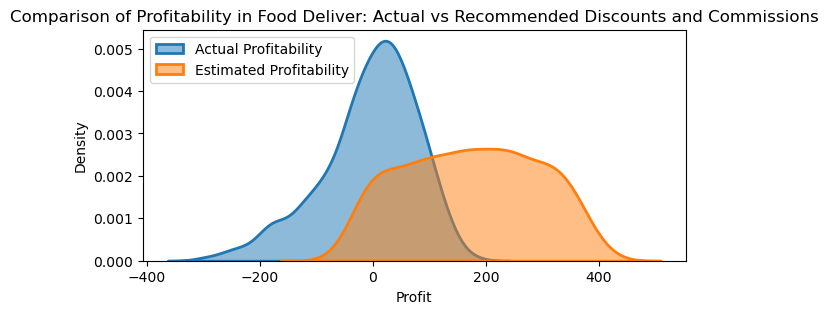

In [336]:
plt.figure(figsize = (7,3))
sns.kdeplot(df['Profit'],label = 'Actual Profitability', fill = True,alpha = 0.5,linewidth = 2)
sns.kdeplot(df['Simulated_Total_Profit'],label = 'Estimated Profitability', fill = True,alpha = 0.5, linewidth = 2)
plt.title('Comparison of Profitability in Food Deliver: Actual vs Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc = 'upper left')